In [23]:
from utils import show, getColor
from skimage import feature, morphology
import numpy as np
import cv2
import os
import numpy as np
from skimage import morphology
from skimage.morphology import medial_axis
from skimage.util import invert
from skimage.io import imread
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# imgPath = os.path.join('..', 'textures', 'map.png')
imgPath = os.path.join('..', 'textures', 'map.jpg')
# imgPath = os.path.join('..', 'textures', 'world.png')

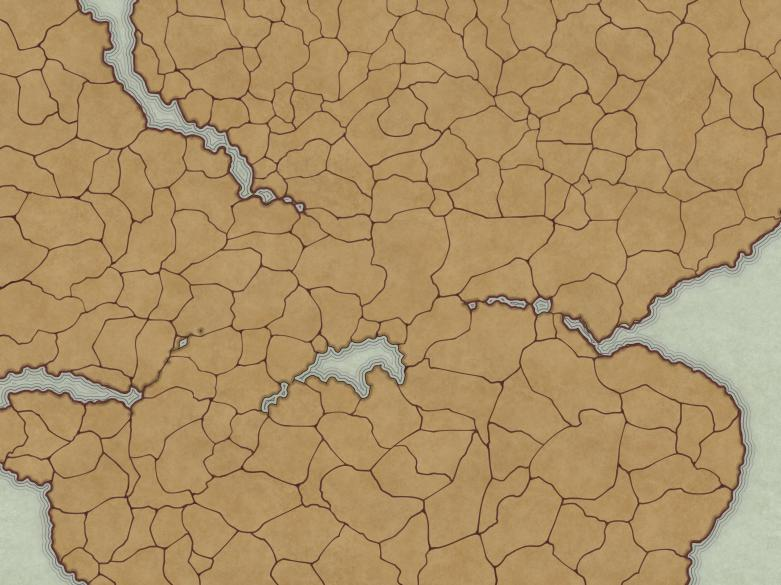

In [3]:
image = cv2.imread(imgPath)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image_rgb)

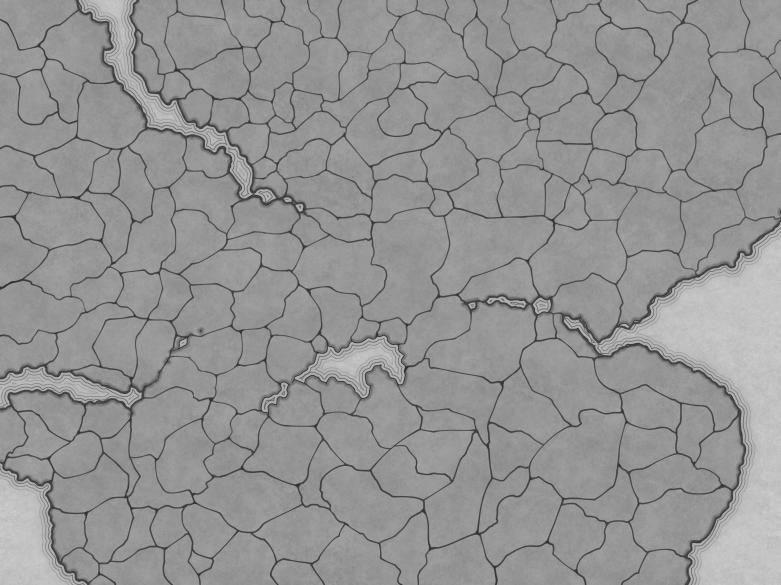

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

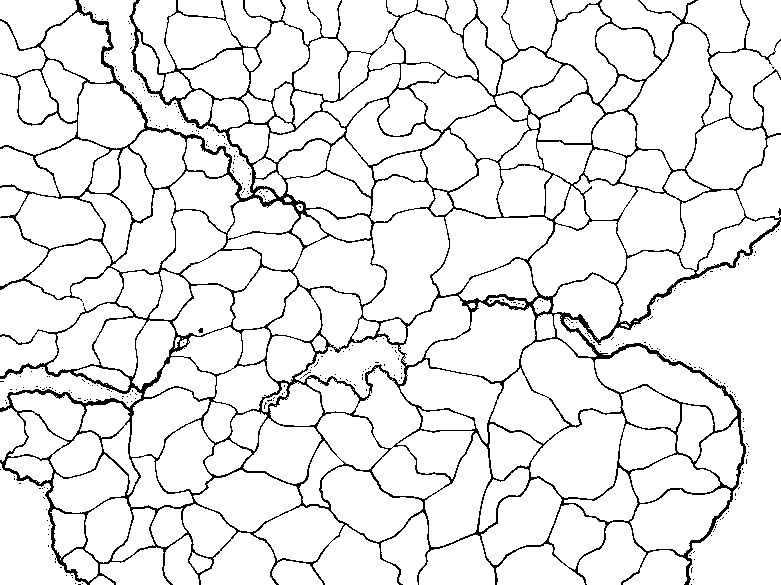

In [7]:
_, thresholded = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
show(thresholded)

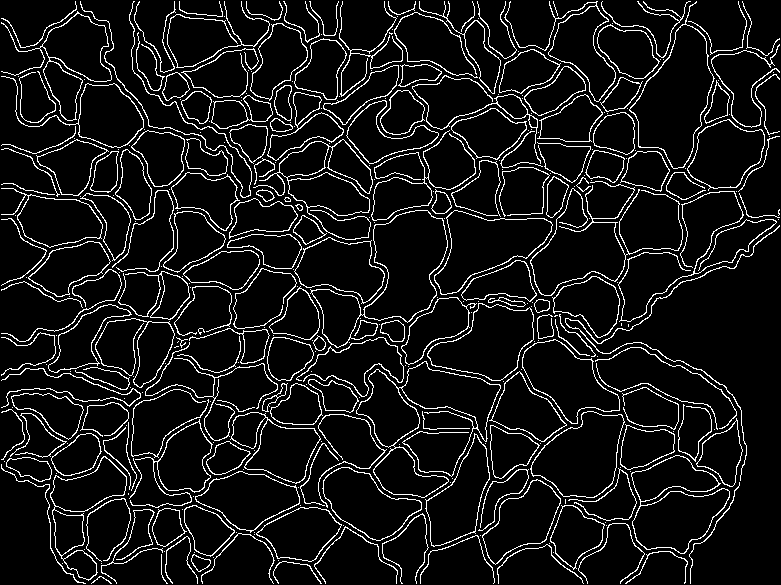

In [8]:
# CANNY
grayThreshold, sigma = 120, 2
_, thresholded = cv2.threshold(gray, grayThreshold, 255, cv2.THRESH_BINARY)
canny = feature.canny(thresholded, sigma=sigma)
show(canny)

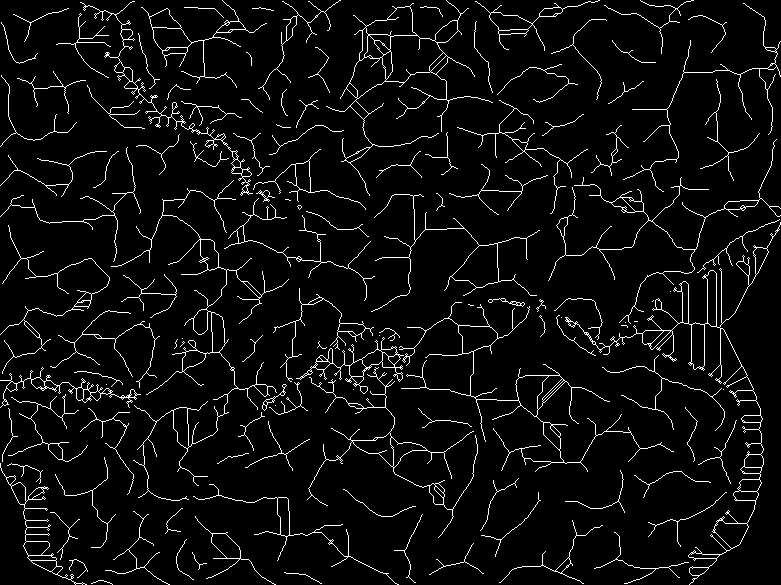

In [9]:
# MORPHOLOGY
_, edges = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
edges = morphology.thin(edges)
show(edges)

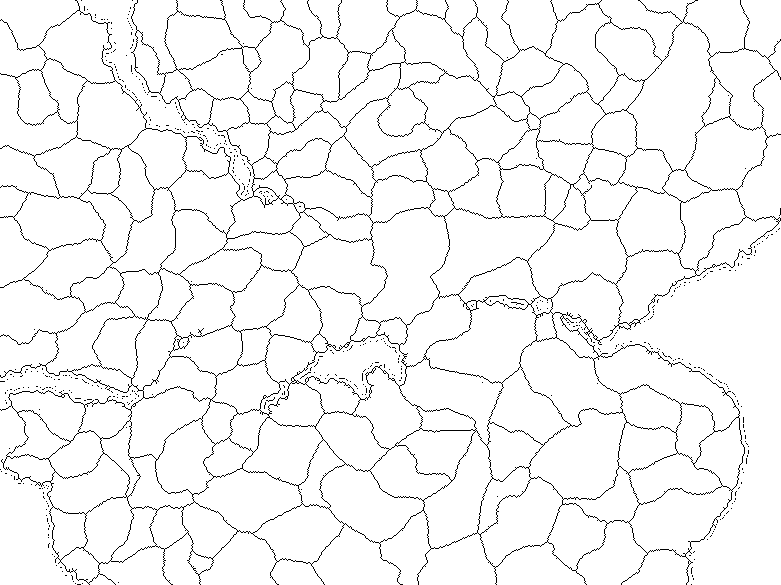

In [15]:
# Skeleton
sensitivity = 0.5
image = imread(imgPath, as_gray=True)
binary_image = image > sensitivity
binary_image = invert(binary_image)

skeleton, distance = medial_axis(binary_image, return_distance=True)
skeleton = invert(skeleton)
show(skeleton)

253


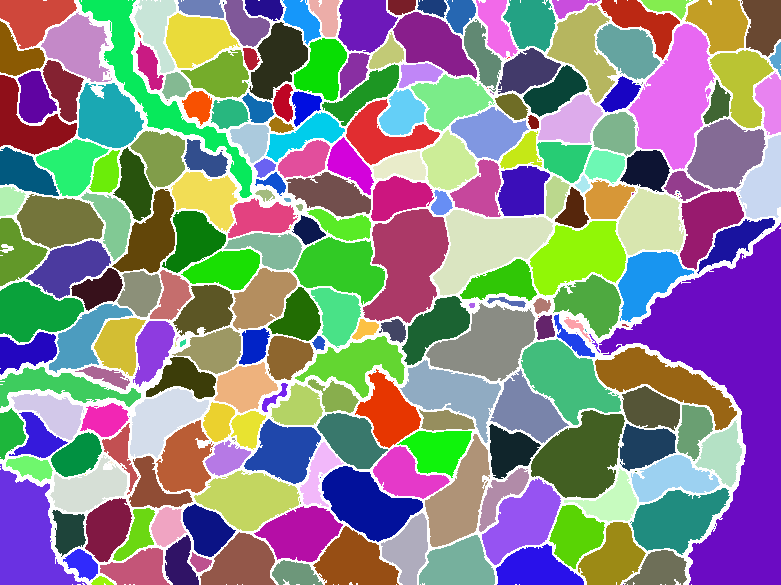

In [18]:
image = cv2.imread(imgPath, 0)


_, thresh = cv2.threshold(image, 143, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

blank_image = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
blank_image[:] = (255, 255, 255)
print(len(contours))

for i, contour in enumerate(contours):
    color = (np.random.randint(0, 255), np.random.randint(
        0, 255), np.random.randint(0, 255))

    cv2.drawContours(blank_image, contours, i, color, -1)


show(blank_image)


253


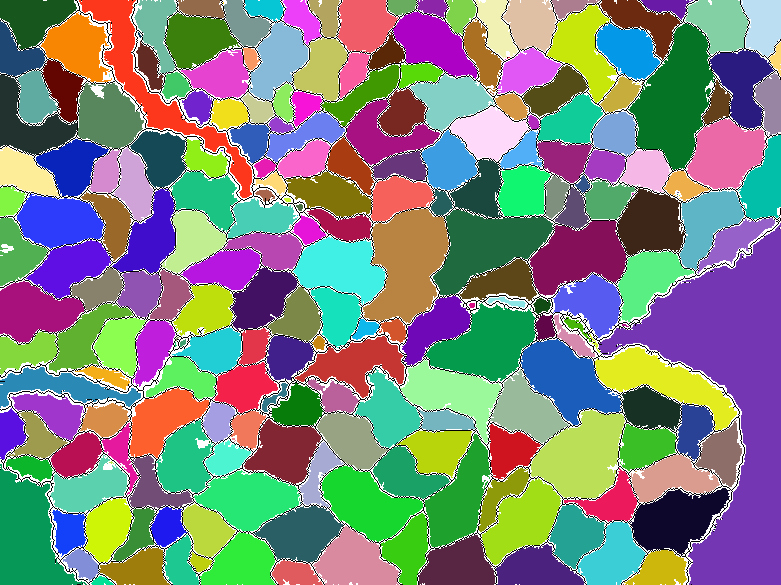

In [19]:
figure = skeleton
skeleton_uint8 = (figure * 255).astype(np.uint8)
image = cv2.imread(imgPath, 0)


_, thresh = cv2.threshold(image, 143, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

filled_image = cv2.cvtColor(skeleton_uint8, cv2.COLOR_GRAY2BGR)

points = []
for i, contour in enumerate(contours):
    color = (np.random.randint(0, 255), np.random.randint(
        0, 255), np.random.randint(0, 255))

    cv2.drawContours(filled_image, contours, i, color, -1)
    points.append(contour[0])

show(filled_image)


(623, 584) -> (153, 83, 69)
(99, 576) -> (2, 225, 149)
(283, 560) -> (224, 91, 94)
(192, 552) -> (190, 207, 15)
(661, 550) -> (205, 183, 13)
(77, 549) -> (131, 142, 217)
(148, 548) -> (159, 125, 13)
(546, 544) -> (75, 34, 126)
(474, 535) -> (88, 38, 67)
(186, 535) -> (30, 201, 145)
(239, 532) -> (47, 236, 59)
(714, 527) -> (6, 95, 86)
(345, 526) -> (218, 138, 158)
(613, 522) -> (59, 206, 214)
(421, 513) -> (57, 205, 18)
(53, 510) -> (18, 65, 249)
(146, 508) -> (56, 143, 53)
(165, 507) -> (30, 25, 239)
(303, 506) -> (42, 95, 101)
(566, 505) -> (36, 162, 148)
(194, 504) -> (187, 217, 60)
(300, 502) -> (25, 109, 113)
(119, 498) -> (206, 244, 6)
(722, 488) -> (12, 7, 43)
(538, 478) -> (161, 222, 22)
(320, 477) -> (38, 128, 83)
(85, 474) -> (17, 102, 21)
(635, 471) -> (194, 149, 69)
(241, 470) -> (38, 230, 116)
(619, 468) -> (236, 26, 92)
(518, 468) -> (142, 154, 9)
(343, 466) -> (22, 215, 45)
(0, 464) -> (5, 152, 87)
(111, 461) -> (182, 227, 75)
(146, 456) -> (114, 77, 117)
(23, 456) -> (1

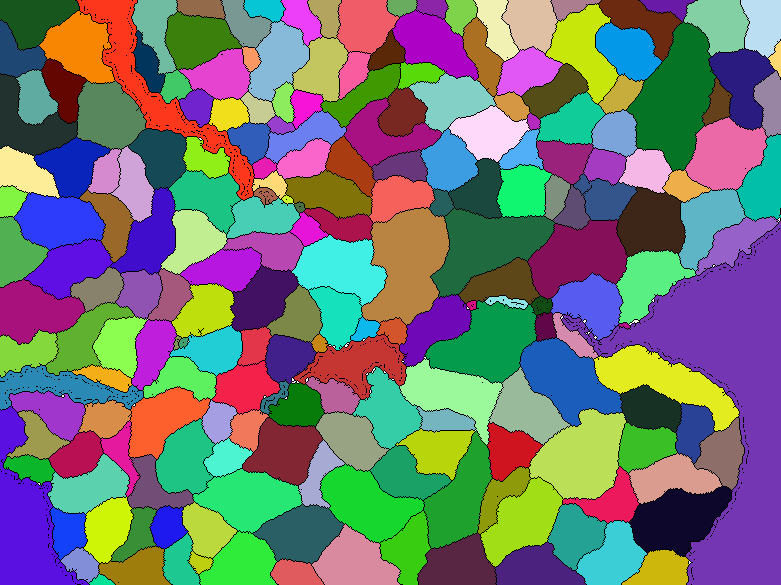

In [21]:
copy = cv2.cvtColor(skeleton_uint8, cv2.COLOR_GRAY2BGR)

for point in points:
    x, y = point[0]
    color = tuple(filled_image[y, x])
    # Numeric values
    color = (int(color[0]), int(color[1]), int(color[2]))
    print(f"({x}, {y}) -> {color}")
    # Floodfill 
    cv2.floodFill(copy, None, (x, y), color)


show(copy)


1 : (623, 584) -> (240, 240, 0)
2 : (99, 576) -> (240, 225, 0)
3 : (283, 560) -> (240, 210, 0)
4 : (192, 552) -> (240, 195, 0)
5 : (661, 550) -> (240, 180, 0)
6 : (77, 549) -> (240, 165, 0)
7 : (148, 548) -> (240, 150, 0)
8 : (546, 544) -> (240, 135, 0)
9 : (474, 535) -> (240, 120, 0)
10 : (186, 535) -> (240, 105, 0)
11 : (239, 532) -> (240, 90, 0)
12 : (714, 527) -> (240, 75, 0)
13 : (345, 526) -> (240, 60, 0)
14 : (613, 522) -> (240, 45, 0)
15 : (421, 513) -> (240, 30, 0)
16 : (53, 510) -> (240, 15, 0)
17 : (146, 508) -> (225, 240, 0)
18 : (165, 507) -> (225, 225, 0)
19 : (303, 506) -> (225, 210, 0)
20 : (566, 505) -> (225, 195, 0)
21 : (194, 504) -> (225, 180, 0)
22 : (300, 502) -> (225, 165, 0)
23 : (119, 498) -> (225, 150, 0)
24 : (722, 488) -> (225, 135, 0)
25 : (538, 478) -> (225, 120, 0)
26 : (320, 477) -> (225, 105, 0)
27 : (85, 474) -> (225, 90, 0)
28 : (635, 471) -> (225, 75, 0)
29 : (241, 470) -> (225, 60, 0)
30 : (619, 468) -> (225, 45, 0)
31 : (518, 468) -> (225, 30, 0)
3

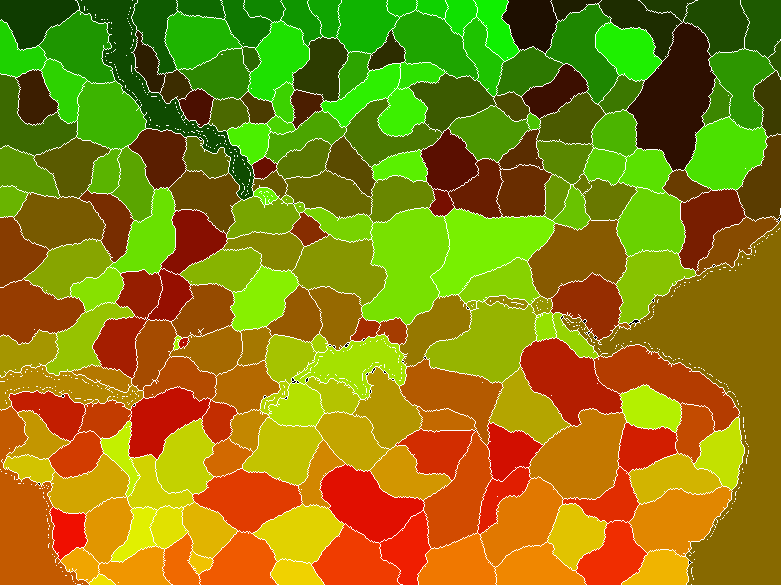

In [26]:
copy = cv2.cvtColor(invert(skeleton_uint8), cv2.COLOR_GRAY2BGR)
i = 0


for point in points:
    x, y = point[0]
    color = getColor(i)
    i += 1
    print(f"{i} : ({x}, {y}) -> {color}")
    # Floodfill 
    cv2.floodFill(copy, None, (x, y), color)


show(copy)
